In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
# Load the Boston Housing Price Prediction dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [3]:
#First look at the dataset

In [4]:
print(boston.shape)

(506, 14)


In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


C:\Users\optim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

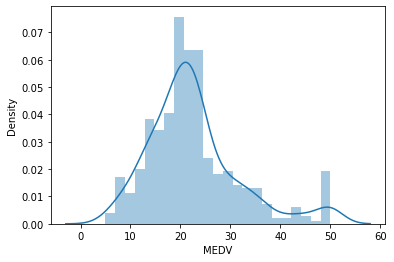

In [8]:
#visualiation

import seaborn as sns
sns.distplot(boston.MEDV)

C:\Users\optim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

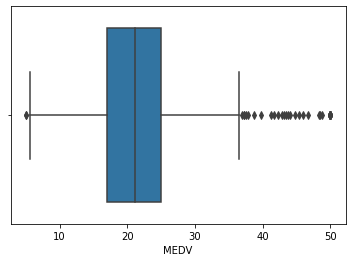

In [9]:
sns.boxplot(boston.MEDV)

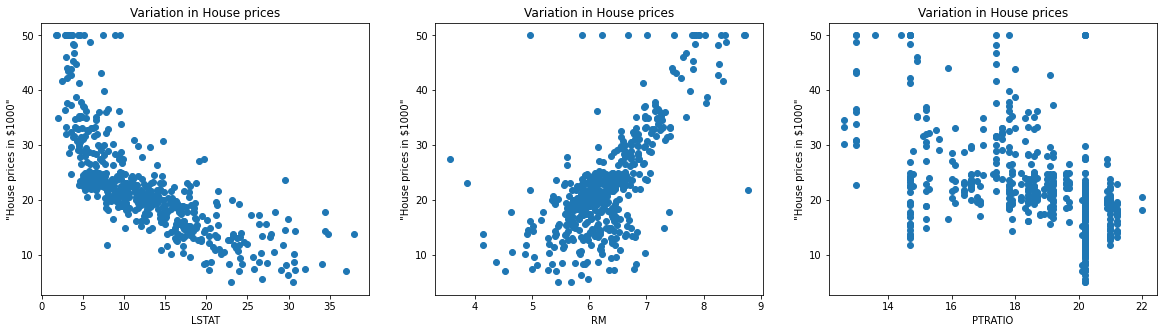

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = boston.MEDV
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [11]:
#Splitting the dependent feature and independent feature
X = boston.iloc[:, :-1].values
y = boston.iloc[:, -1].values

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [13]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
13/13 [==============================] - 2s 41ms/step - loss: 472.9290 - val_loss: 199.5276
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 144.1095 - val_loss: 90.6631
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 90.8229 - val_loss: 73.9286
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 81.2818 - val_loss: 72.2751
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 75.2889 - val_loss: 74.9378
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 73.9811 - val_loss: 55.8385
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 71.3448 - val_loss: 57.9269
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 63.7943 - val_loss: 50.3740
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 57.9134 - val_loss: 43.3341
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 57.2458 - val

In [15]:
# Evaluate the performance of the model on the test data
mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Mean Squared Error: {mse:0.3f}')

Test Mean Squared Error: 23.721


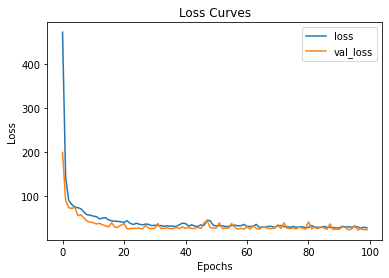

In [17]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()